## Stability
Defined by \frec{#patches in label i }/{# all patches} 

In [1]:
import os
import sys
import glob
import numpy as np

In [23]:
import matplotlib
import matplotlib.pyplot as plt

In [38]:
sys.path.insert(1, os.path.join(sys.path[0],"/home/tkurihana/scratch-midway2/data/MOD06/" ) )
from analysis_lib import _get_colors

In [3]:
datadir = '/home/tkurihana/scratch-midway2/anl/output_2000_2018_random'

### n_cluster = 10

In [2]:
n_cluster = 10

In [4]:
a = np.load(datadir+'/sd_p-1500.0_nc-10_m22_agu_spark_patches_labels_2000-2018-random.npy')

In [12]:
clusters = []
nall = 1500*1000
for i in range(n_cluster):
    clusters += [len(np.argwhere(a == i))/nall*100]

In [13]:
clusters

[0.8230666666666667,
 4.108866666666667,
 5.748466666666667,
 6.625,
 7.2916,
 17.4982,
 19.124333333333333,
 19.710733333333334,
 14.869333333333334,
 4.2004]

In [20]:
ranges = [1,10,200,300,400,500,600,1000,1500]
ratio_list = []
for inum in ranges:
    clusters = []
    iarray = np.load(datadir+'/sd_p-'+str(inum)+'.0_nc-'+str(n_cluster)+'_m22_agu_spark_patches_labels_2000-2018-random.npy')
    nall = inum * 1000 # unit = 1,000 patches
    for icluster in range(n_cluster) :
        clusters += [ len(np.argwhere(iarray == icluster))/nall*100]
    ratio_list += [clusters]
ratio_array = np.asarray(ratio_list) #np.array

In [21]:
ratio_array.shape

(9, 10)

In [39]:
colors = _get_colors(n=n_cluster)

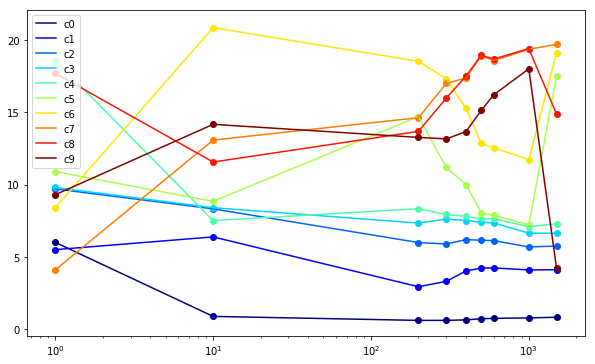

In [42]:
plt.figure(figsize=(10,6))
for i in range(n_cluster):
    plt.plot(ranges, ratio_array[:,i],color=colors[i], label='c'+str(i))
    plt.scatter(ranges, ratio_array[:,i], color=colors[i])
    plt.xscale("log")
plt.legend(loc='upper left')
#plt.grid(which='major',color='black',linestyle='-')
#plt.grid(which='minor',color='black',linestyle='-')

### Other cluster numbers

In [47]:
ranges = [1,10,100,500,1500]

In [44]:
n_clusters = [3,4,5,6,7,8,10,12,14,16,18,20,22,24,26,28]

In [68]:
cluster_list = []
for n_cluster in n_clusters:
    ratio_list = []
    for inum in ranges:
        clusters = []
        iarray = np.load(datadir+'/sd_p-'+str(inum)+'.0_nc-'+str(n_cluster)+'_m22_agu_spark_patches_labels_2000-2018-random.npy')
        nall = inum * 1000 # unit = 1,000 patches
        for icluster in range(n_cluster) :
            clusters += [ len(np.argwhere(iarray == icluster))/nall*100]
        ratio_list += [clusters]
    cluster_list += [ratio_list]
ratio_array = np.asarray(cluster_list) #np.array

In [69]:
ratio_array.shape

(16, 5)

In [71]:
def _gen_iarray(iarray):
    array = np.zeros((len(iarray), len(iarray[0])))
    for idx, i in enumerate(iarray):
        for jdx, j in enumerate(i):
            array[idx, jdx] = j
    return array

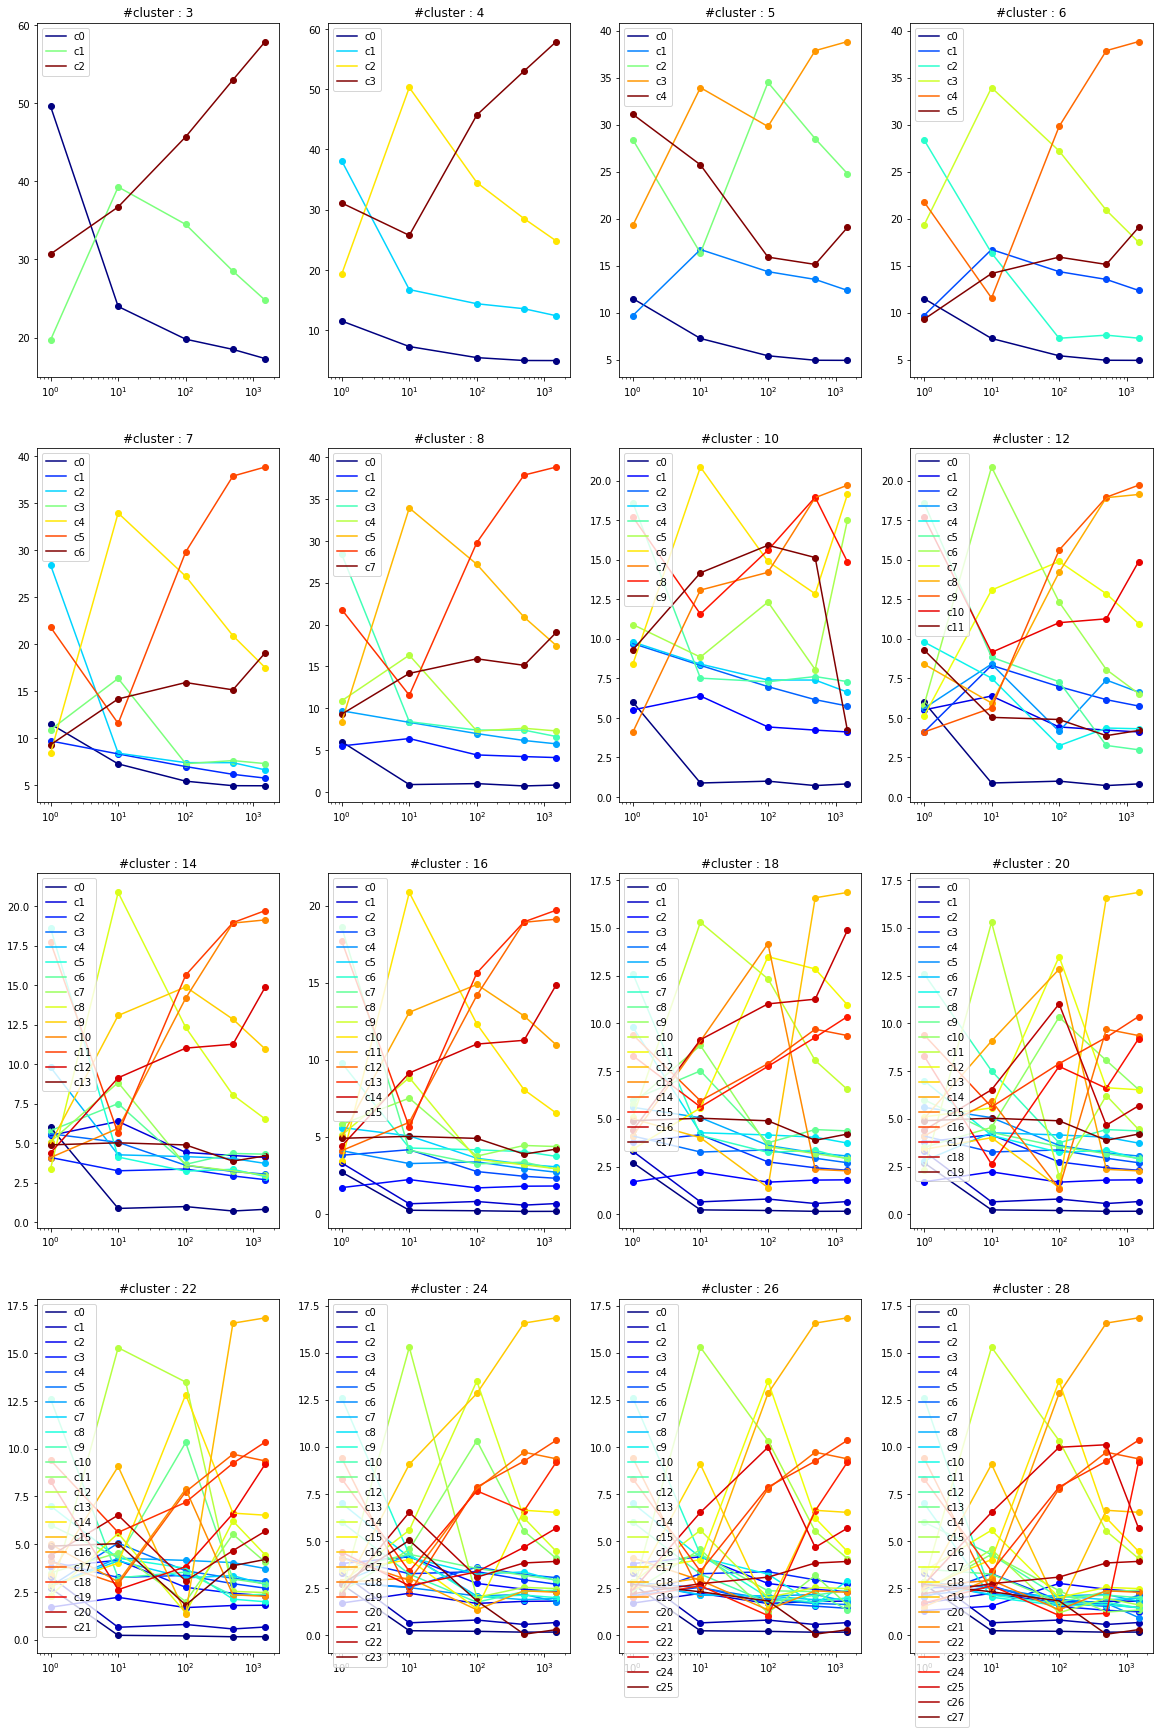

In [73]:
plt.figure(figsize=(20,30))
for index,iarray in enumerate(ratio_array):
    ax = plt.subplot(4, 4, index+1)
    colors = _get_colors(n=n_clusters[index])
    ax.set_title("#cluster : %d" % n_clusters[index])
    _iarray = _gen_iarray(iarray)
    for i in range(n_clusters[index]):
        plt.plot(ranges, _iarray[:,i],color=colors[i], label='c'+str(i))
        plt.scatter(ranges, _iarray[:,i], color=colors[i])
        plt.xscale("log")
        plt.legend(loc='upper left') 